# Assignment Explanation

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in the last 100 Tweets sent out by the following news organizations: __BBC, CBS, CNN, Fox, and New York times__.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
* Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

As final considerations:

* Use the Matplotlib and Seaborn libraries.
* Include a written description of three observable trends based on the data. 
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
* Include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  


Hints, requirements, and considerations:

* You may find it helpful to organize your code in function(s), then call them.
* If you're not yet familiar with creating functions in Python, here is a tutorial you may wish to consult: [https://www.tutorialspoint.com/python/python_functions.htm](https://www.tutorialspoint.com/python/python_functions.htm).



## Copyright

Coding Boot Camp (C) 2017. All Rights Reserved.

# NewsVADERPy: News Mood Analysis

- Trend 1
- Trend 2
- Trend 3

In [1]:
# ----------------------------------------------------------------------
# Step 1: Import necessary modules and environment
# ----------------------------------------------------------------------

# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# This file contains all Twitter-related actions, so no need to import here
import tweetParser as tp

In [2]:
# ----------------------------------------------------------------------
# Step 2: Call API, get tweets, and parse tweets into a dataframe+CSV
# ----------------------------------------------------------------------

# create list of target news organizations' Twitter handles
targetNewsOrg_list = ["BBC","FoxNews","nytimes", "BreitbartNews",
                      "CBSNews","USATODAY"]

# define number of tweets we want to pull from each org
numTweets = 100

# break into increments of 10
numCycles = int(round(numTweets/10))

# create dict to store dictionaries generated during analysis
completeResults_df = tp.parseTweets(targetNewsOrg_list, numCycles)

# rearrange columns to be more sensible
completeResults_df = completeResults_df[["handle", "count", "compound",
                                         "positive", "negative", "neutral",
                                         "date", "text"]].sort_values('date')
completeResults_df.to_csv("TweetsAnalyzed.csv")

completeResults_df.head()

,handle,count,compound,positive,negative,neutral,date,text
99,BBC,100,0.5859,0.231,0.000,0.769,1.519967e+09,We've been creating and designing for thousand...
98,BBC,99,0.9081,0.383,0.000,0.617,1.519967e+09,RT @simon_schama: After 3 years of work #Civil...
97,BBC,98,0.7712,0.489,0.000,0.511,1.519967e+09,"A greeting from roughly 37,000 years ago. 👋 Am..."
96,BBC,97,0.0000,0.000,0.000,1.000,1.519968e+09,"RT @bbcarts: As #Civilisations, a series 3 yea..."
95,BBC,96,-0.3818,0.000,0.126,0.874,1.519969e+09,High-resolution photographs of this tiny seal ...


The first plot will be and/or feature the following:

- Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
- Each plot point will reflect the compound sentiment of a tweet.
- Sort each plot point by its relative timestamp.


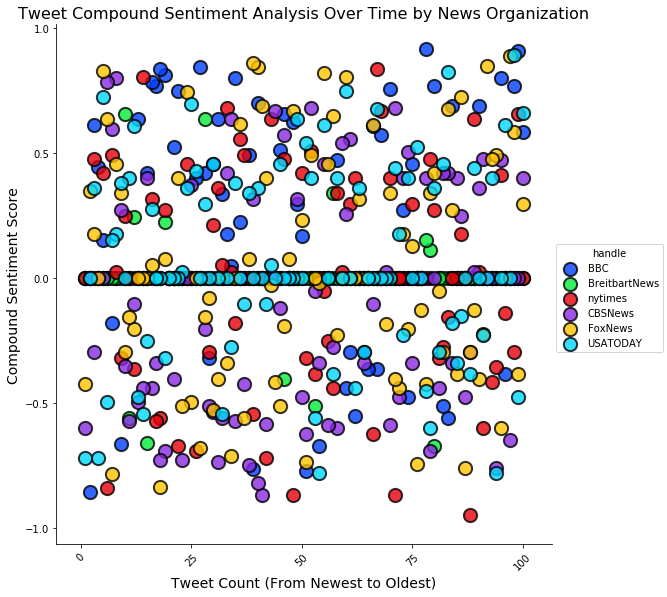

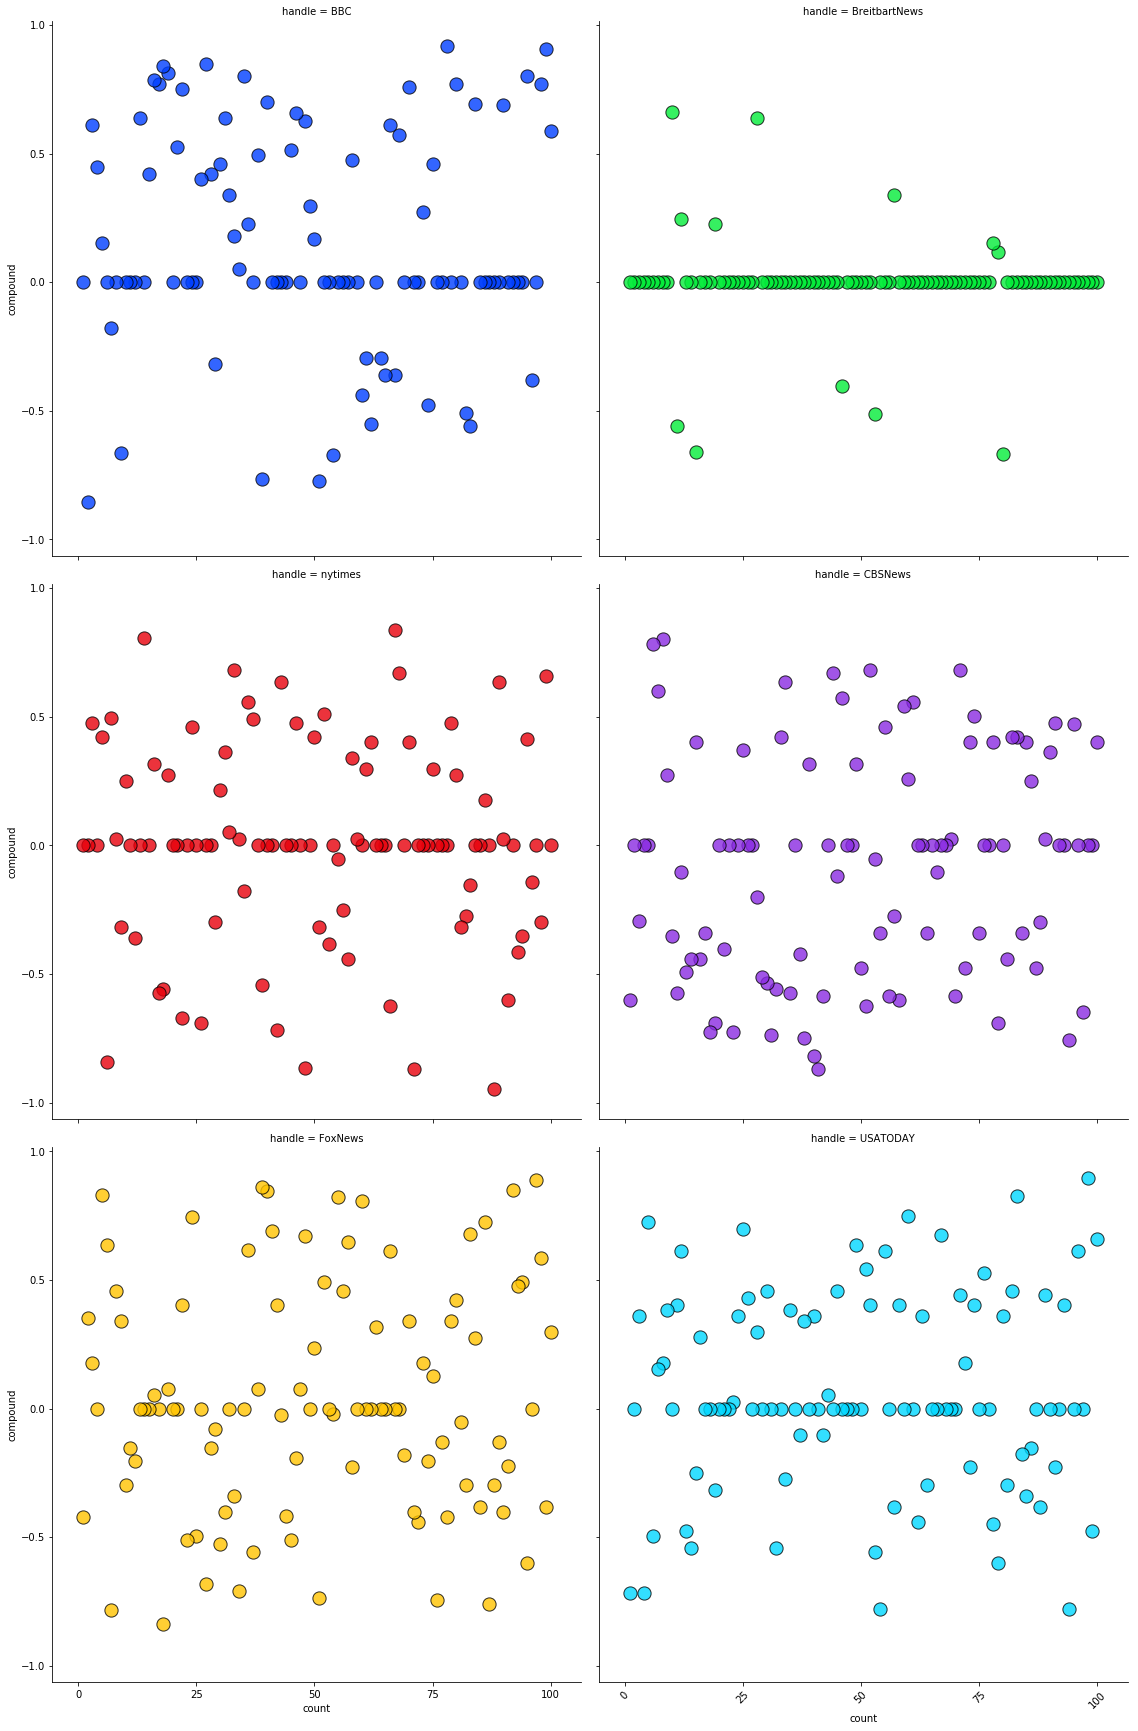

In [13]:
# ----------------------------------------------------------------------
# Step 4: Generate first plot: scatterplot of last 100 tweets showing 
# compound sentiment and sorted by relative timestamp
# ----------------------------------------------------------------------
# generate overall plot
orgPalette = sns.color_palette("bright", len(targetNewsOrg_list))
compoundSentByTime_plot = sns.lmplot(x="count", y="compound", 
                                data=completeResults_df, 
                                palette=orgPalette, hue='handle',
                                fit_reg=False, legend=True, size=8, 
                                scatter_kws={'s':175,
                                             'edgecolors':'black', 
                                             'linewidths':2})
plt.xlabel("Tweet Count (From Newest to Oldest)",size=14)
plt.ylabel("Compound Sentiment Score", size=14)
plt.title("Tweet Compound Sentiment Analysis Over Time by News Organization", 
          size=16)
plt.locator_params(nbins=5)
plt.xticks(rotation=45)

#generate subplots
orgPalette = sns.color_palette("bright", len(targetNewsOrg_list))
compoundSentByTime_subplots = sns.lmplot(x="count", y="compound", 
                                data=completeResults_df, 
                                col="handle", col_wrap = 2,
                                palette=orgPalette, hue='handle',
                                fit_reg=False, legend=True, size=8,
                                scatter_kws={'s':175, 
                                             'edgecolors':'black', 
                                             'linewidths':1})
plt.locator_params(nbins=5)
plt.xticks(rotation=45)
plt.show(compoundSentByTime_plot)
plt.show(compoundSentByTime_subplots)

bar plot visualizing the overall sentiments of the last 100 tweets from each organization. 
For this plot, you will again aggregate the compound sentiments analyzed by VADER.



In [ ]:
# ----------------------------------------------------------------------
# Step 5: Generate second plot: bar plot showing overall compound 
# sentiment in the last 100 tweets
# ----------------------------------------------------------------------
